In [1]:
## Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
## load PIMA indians dataset
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [ ]:
#train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
model=LogisticRegression()
model.fit(X_train,y_train)

d:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
y_pred=model.predict(X_test)

In [9]:
accuracy=accuracy_score(y_test,y_pred)
conf_mat=confusion_matrix(y_test,y_pred)
class_report=classification_report(y_test,y_pred)
print("Accuracy:",accuracy)
print("Confusion Matrix:",conf_mat)
print("Classification Report:",class_report)


Accuracy: 0.7467532467532467
Confusion Matrix: [[78 21]
 [18 37]]
Classification Report:               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



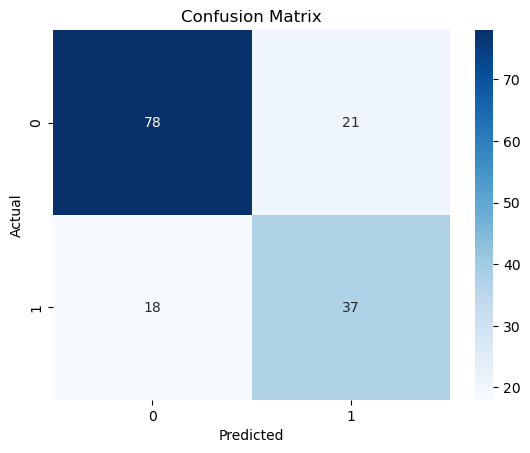

In [10]:
sns.heatmap(conf_mat,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [22]:
# outcome of new data will be either 0 or 1 
new_data=pd.DataFrame({
    'Pregnancies':[5],
    'Glucose':[210],
    'BloodPressure':[100],
    'SkinThickness':[25],
    'Insulin':[200],
    'BMI':[40],
    'DiabetesPedigreeFunction':[0.8],
    'Age':[42]
})

predicted_outcome=model.predict(new_data)
y_pred_label=["yes" if predicted_outcome==1 else "No" for predicted_outcome in predicted_outcome]
print(y_pred_label)

['yes']
